# 1. Import and Install Dependencies

In [58]:
!pip install tensorflow==2.5.0rc0 tensorflow-gpu==2.5.0 opencv-python mediapipe sklearn matplotlib

  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
pylint 2.12.2 requires typing-extensions>=3.10.0; python_version < "3.10", but you have typing-extensions 3.7.4.3 which is incompatible.
astroid 2.9.0 requires typing-extensions>=3.10; python_version < "3.10", but you have typing-extensions 3.7.4.3 which is incompatible.
spyder 5.1.5 requires pylint<2.10.0,>=2.5.0, but you have pylint 2.12.2 which is incompatible.
bokeh 2.4.1 requires typing-extensions>=3.10.0, but you have typing-extensions 3.7.4.3 which is incompatible.


In [59]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import shutil

# 2. Keypoint using MP Holistic

In [60]:
mp_holistic = mp.solutions.holistic  #Holistic model
mp_drawing = mp.solutions.drawing_utils  #Drawing utilities

In [61]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [62]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [63]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [64]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [10]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read live feed from webcam
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw Landmarks
        draw_landmarks(image, results)

        # Show on screen
        cv2.imshow("OpenCV-WebcamFeed", image)

        # Breaking loop to exit by pressing 'q' on keyboard
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [11]:
len(results.left_hand_landmarks.landmark)

21

In [12]:
results

mediapipe.python.solution_base.SolutionOutputs

In [13]:
draw_landmarks(frame, results)

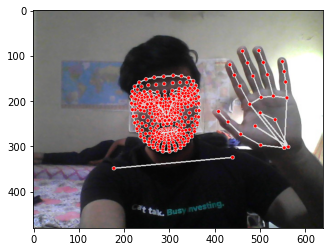

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [15]:
len(results.left_hand_landmarks.landmark)

21

In [16]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [18]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [19]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [20]:
result_test = extract_keypoints(results)

In [21]:
result_test

array([ 0.46162692,  0.49072033, -0.75995016, ...,  0.        ,
        0.        ,  0.        ])

In [22]:
np.save('0', result_test)

In [23]:
np.load('0.npy')

array([ 0.46162692,  0.49072033, -0.75995016, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [24]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'victory', 'happy_thumbsup'])

# Thirty videos worth of data
no_sequences = 10

# Videos are going to be 10 frames in length
sequence_length = 10

# Folder start
start_folder = 0

In [25]:
for action in actions: 
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [26]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [28]:
label_map = {label:num for num, label in enumerate(actions)}

In [29]:
label_map

{'hello': 0, 'victory': 1, 'happy_thumbsup': 2}

In [30]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [31]:
np.array(sequences).shape

(30, 10, 1662)

In [32]:
np.array(labels).shape

(30,)

In [33]:
X = np.array(sequences)

In [34]:
X.shape

(30, 10, 1662)

In [35]:
y = to_categorical(labels).astype(int)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [37]:
y_test.shape

(2, 3)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [39]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [40]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(10,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [41]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [42]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
1/1 [==============================] - 5s 5s/step - loss: 1.0972 - categorical_accuracy: 0.3571
Epoch 2/2000
1/1 [==============================] - 2s 2s/step - loss: 1.1081 - categorical_accuracy: 0.3571
Epoch 3/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.0836 - categorical_accuracy: 0.3571
Epoch 4/2000
1/1 [==============================] - 0s 35ms/step - loss: 1.1184 - categorical_accuracy: 0.3571
Epoch 5/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.0795 - categorical_accuracy: 0.3571
Epoch 6/2000
1/1 [==============================] - 0s 41ms/step - loss: 1.0817 - categorical_accuracy: 0.6786
Epoch 7/2000
1/1 [==============================] - 0s 48ms/step - loss: 1.0854 - categorical_accuracy: 0.3571
Epoch 8/2000
1/1 [==============================] - 0s 41ms/step - loss: 1.0847 - categorical_accuracy: 0.3571
Epoch 9/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.0792 - categorical_accuracy: 0.3571
Epoch

1/1 [==============================] - 0s 43ms/step - loss: 0.5428 - categorical_accuracy: 0.6786
Epoch 74/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.5353 - categorical_accuracy: 0.6786
Epoch 75/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.5203 - categorical_accuracy: 0.7143
Epoch 76/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.5083 - categorical_accuracy: 0.7143
Epoch 77/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.5057 - categorical_accuracy: 0.6786
Epoch 78/2000
1/1 [==============================] - 0s 53ms/step - loss: 0.5063 - categorical_accuracy: 0.6786
Epoch 79/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.4942 - categorical_accuracy: 0.6786
Epoch 80/2000
1/1 [==============================] - 0s 44ms/step - loss: 0.4808 - categorical_accuracy: 0.7143
Epoch 81/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.4805 - categorical_accuracy: 0.7143
Epoch 

1/1 [==============================] - 0s 34ms/step - loss: 0.5220 - categorical_accuracy: 0.6786
Epoch 146/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.4062 - categorical_accuracy: 0.7143
Epoch 147/2000
1/1 [==============================] - 0s 47ms/step - loss: 0.5445 - categorical_accuracy: 0.6786
Epoch 148/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.4706 - categorical_accuracy: 0.6786
Epoch 149/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.4037 - categorical_accuracy: 0.7857
Epoch 150/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.4784 - categorical_accuracy: 0.6786
Epoch 151/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.4068 - categorical_accuracy: 0.7500
Epoch 152/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.3155 - categorical_accuracy: 0.8929
Epoch 153/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.5793 - categorical_accuracy: 0.642

1/1 [==============================] - 0s 43ms/step - loss: 0.4551 - categorical_accuracy: 0.7857
Epoch 218/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.4273 - categorical_accuracy: 0.8571
Epoch 219/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.4018 - categorical_accuracy: 0.9286
Epoch 220/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.3686 - categorical_accuracy: 0.9286
Epoch 221/2000
1/1 [==============================] - 0s 47ms/step - loss: 0.3327 - categorical_accuracy: 0.9286
Epoch 222/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.2970 - categorical_accuracy: 0.9286
Epoch 223/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.2531 - categorical_accuracy: 0.9286
Epoch 224/2000
1/1 [==============================] - 0s 61ms/step - loss: 0.2191 - categorical_accuracy: 0.9286
Epoch 225/2000
1/1 [==============================] - 0s 47ms/step - loss: 0.1913 - categorical_accuracy: 0.964

1/1 [==============================] - 0s 34ms/step - loss: 0.3452 - categorical_accuracy: 0.8929
Epoch 290/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.2937 - categorical_accuracy: 0.9643
Epoch 291/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.2769 - categorical_accuracy: 0.9286
Epoch 292/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.3021 - categorical_accuracy: 0.8571
Epoch 293/2000
1/1 [==============================] - 0s 111ms/step - loss: 0.2679 - categorical_accuracy: 0.8929
Epoch 294/2000
1/1 [==============================] - 0s 64ms/step - loss: 0.2389 - categorical_accuracy: 1.0000
Epoch 295/2000
1/1 [==============================] - 0s 67ms/step - loss: 0.2576 - categorical_accuracy: 0.9286
Epoch 296/2000
1/1 [==============================] - 0s 64ms/step - loss: 0.2382 - categorical_accuracy: 1.0000
Epoch 297/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.2046 - categorical_accuracy: 1.00

1/1 [==============================] - 0s 37ms/step - loss: 0.5281 - categorical_accuracy: 0.8214
Epoch 362/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.5298 - categorical_accuracy: 0.8571
Epoch 363/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.5267 - categorical_accuracy: 0.8571
Epoch 364/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.5205 - categorical_accuracy: 0.8571
Epoch 365/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.5122 - categorical_accuracy: 0.8571
Epoch 366/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.5023 - categorical_accuracy: 0.8571
Epoch 367/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.4911 - categorical_accuracy: 0.8214
Epoch 368/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.4785 - categorical_accuracy: 0.8214
Epoch 369/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.4635 - categorical_accuracy: 0.821

1/1 [==============================] - 0s 35ms/step - loss: 4.5171e-06 - categorical_accuracy: 1.0000
Epoch 433/2000
1/1 [==============================] - 0s 34ms/step - loss: 4.2191e-06 - categorical_accuracy: 1.0000
Epoch 434/2000
1/1 [==============================] - 0s 35ms/step - loss: 4.1850e-06 - categorical_accuracy: 1.0000
Epoch 435/2000
1/1 [==============================] - 0s 34ms/step - loss: 4.3425e-06 - categorical_accuracy: 1.0000
Epoch 436/2000
1/1 [==============================] - 0s 35ms/step - loss: 4.6405e-06 - categorical_accuracy: 1.0000
Epoch 437/2000
1/1 [==============================] - 0s 37ms/step - loss: 5.0322e-06 - categorical_accuracy: 1.0000
Epoch 438/2000
1/1 [==============================] - 0s 34ms/step - loss: 5.4494e-06 - categorical_accuracy: 1.0000
Epoch 439/2000
1/1 [==============================] - 0s 37ms/step - loss: 5.8326e-06 - categorical_accuracy: 1.0000
Epoch 440/2000
1/1 [==============================] - 0s 39ms/step - loss: 6.10

1/1 [==============================] - 0s 35ms/step - loss: 2.0563e-06 - categorical_accuracy: 1.0000
Epoch 503/2000
1/1 [==============================] - 0s 36ms/step - loss: 2.0563e-06 - categorical_accuracy: 1.0000
Epoch 504/2000
1/1 [==============================] - 0s 35ms/step - loss: 2.0521e-06 - categorical_accuracy: 1.0000
Epoch 505/2000
1/1 [==============================] - 0s 34ms/step - loss: 2.0478e-06 - categorical_accuracy: 1.0000
Epoch 506/2000
1/1 [==============================] - 0s 39ms/step - loss: 2.0393e-06 - categorical_accuracy: 1.0000
Epoch 507/2000
1/1 [==============================] - 0s 67ms/step - loss: 2.0351e-06 - categorical_accuracy: 1.0000
Epoch 508/2000
1/1 [==============================] - 0s 64ms/step - loss: 2.0265e-06 - categorical_accuracy: 1.0000
Epoch 509/2000
1/1 [==============================] - 0s 42ms/step - loss: 2.0308e-06 - categorical_accuracy: 1.0000
Epoch 510/2000
1/1 [==============================] - 0s 34ms/step - loss: 2.01

1/1 [==============================] - 0s 35ms/step - loss: 1.7498e-06 - categorical_accuracy: 1.0000
Epoch 573/2000
1/1 [==============================] - 0s 35ms/step - loss: 1.7498e-06 - categorical_accuracy: 1.0000
Epoch 574/2000
1/1 [==============================] - 0s 48ms/step - loss: 1.7413e-06 - categorical_accuracy: 1.0000
Epoch 575/2000
1/1 [==============================] - 0s 66ms/step - loss: 1.7413e-06 - categorical_accuracy: 1.0000
Epoch 576/2000
1/1 [==============================] - 0s 46ms/step - loss: 1.7370e-06 - categorical_accuracy: 1.0000
Epoch 577/2000
1/1 [==============================] - 0s 47ms/step - loss: 1.7370e-06 - categorical_accuracy: 1.0000
Epoch 578/2000
1/1 [==============================] - 0s 60ms/step - loss: 1.7285e-06 - categorical_accuracy: 1.0000
Epoch 579/2000
1/1 [==============================] - 0s 51ms/step - loss: 1.7200e-06 - categorical_accuracy: 1.0000
Epoch 580/2000
1/1 [==============================] - 0s 52ms/step - loss: 1.72

1/1 [==============================] - 0s 64ms/step - loss: 1.5327e-06 - categorical_accuracy: 1.0000
Epoch 643/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.5284e-06 - categorical_accuracy: 1.0000
Epoch 644/2000
1/1 [==============================] - 0s 35ms/step - loss: 1.5284e-06 - categorical_accuracy: 1.0000
Epoch 645/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.5242e-06 - categorical_accuracy: 1.0000
Epoch 646/2000
1/1 [==============================] - 0s 35ms/step - loss: 1.5157e-06 - categorical_accuracy: 1.0000
Epoch 647/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.5157e-06 - categorical_accuracy: 1.0000
Epoch 648/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.5157e-06 - categorical_accuracy: 1.0000
Epoch 649/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.5114e-06 - categorical_accuracy: 1.0000
Epoch 650/2000
1/1 [==============================] - 0s 35ms/step - loss: 1.50

1/1 [==============================] - 0s 36ms/step - loss: 1.3496e-06 - categorical_accuracy: 1.0000
Epoch 713/2000
1/1 [==============================] - 0s 35ms/step - loss: 1.3496e-06 - categorical_accuracy: 1.0000
Epoch 714/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.3454e-06 - categorical_accuracy: 1.0000
Epoch 715/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.3368e-06 - categorical_accuracy: 1.0000
Epoch 716/2000
1/1 [==============================] - 0s 45ms/step - loss: 1.3368e-06 - categorical_accuracy: 1.0000
Epoch 717/2000
1/1 [==============================] - 0s 48ms/step - loss: 1.3368e-06 - categorical_accuracy: 1.0000
Epoch 718/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.3283e-06 - categorical_accuracy: 1.0000
Epoch 719/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.3283e-06 - categorical_accuracy: 1.0000
Epoch 720/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.31

1/1 [==============================] - 0s 36ms/step - loss: 1.0771e-06 - categorical_accuracy: 1.0000
Epoch 783/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.0771e-06 - categorical_accuracy: 1.0000
Epoch 784/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.0686e-06 - categorical_accuracy: 1.0000
Epoch 785/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.0686e-06 - categorical_accuracy: 1.0000
Epoch 786/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.0644e-06 - categorical_accuracy: 1.0000
Epoch 787/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.0601e-06 - categorical_accuracy: 1.0000
Epoch 788/2000
1/1 [==============================] - 0s 39ms/step - loss: 1.0516e-06 - categorical_accuracy: 1.0000
Epoch 789/2000
1/1 [==============================] - 0s 35ms/step - loss: 1.0473e-06 - categorical_accuracy: 1.0000
Epoch 790/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.03

1/1 [==============================] - 0s 34ms/step - loss: 7.8763e-07 - categorical_accuracy: 1.0000
Epoch 853/2000
1/1 [==============================] - 0s 35ms/step - loss: 7.8763e-07 - categorical_accuracy: 1.0000
Epoch 854/2000
1/1 [==============================] - 0s 33ms/step - loss: 7.7912e-07 - categorical_accuracy: 1.0000
Epoch 855/2000
1/1 [==============================] - 0s 35ms/step - loss: 7.7486e-07 - categorical_accuracy: 1.0000
Epoch 856/2000
1/1 [==============================] - 0s 43ms/step - loss: 7.7486e-07 - categorical_accuracy: 1.0000
Epoch 857/2000
1/1 [==============================] - 0s 35ms/step - loss: 7.7486e-07 - categorical_accuracy: 1.0000
Epoch 858/2000
1/1 [==============================] - 0s 35ms/step - loss: 7.6209e-07 - categorical_accuracy: 1.0000
Epoch 859/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.6209e-07 - categorical_accuracy: 1.0000
Epoch 860/2000
1/1 [==============================] - 0s 34ms/step - loss: 7.62

1/1 [==============================] - 0s 39ms/step - loss: 6.3436e-07 - categorical_accuracy: 1.0000
Epoch 923/2000
1/1 [==============================] - 0s 35ms/step - loss: 6.3436e-07 - categorical_accuracy: 1.0000
Epoch 924/2000
1/1 [==============================] - 0s 34ms/step - loss: 6.3436e-07 - categorical_accuracy: 1.0000
Epoch 925/2000
1/1 [==============================] - 0s 34ms/step - loss: 6.3436e-07 - categorical_accuracy: 1.0000
Epoch 926/2000
1/1 [==============================] - 0s 35ms/step - loss: 6.3436e-07 - categorical_accuracy: 1.0000
Epoch 927/2000
1/1 [==============================] - 0s 34ms/step - loss: 6.3010e-07 - categorical_accuracy: 1.0000
Epoch 928/2000
1/1 [==============================] - 0s 35ms/step - loss: 6.2585e-07 - categorical_accuracy: 1.0000
Epoch 929/2000
1/1 [==============================] - 0s 34ms/step - loss: 6.2585e-07 - categorical_accuracy: 1.0000
Epoch 930/2000
1/1 [==============================] - 0s 34ms/step - loss: 6.25

1/1 [==============================] - 0s 35ms/step - loss: 5.4496e-07 - categorical_accuracy: 1.0000
Epoch 993/2000
1/1 [==============================] - 0s 35ms/step - loss: 5.4496e-07 - categorical_accuracy: 1.0000
Epoch 994/2000
1/1 [==============================] - 0s 35ms/step - loss: 5.4496e-07 - categorical_accuracy: 1.0000
Epoch 995/2000
1/1 [==============================] - 0s 34ms/step - loss: 5.4496e-07 - categorical_accuracy: 1.0000
Epoch 996/2000
1/1 [==============================] - 0s 35ms/step - loss: 5.4496e-07 - categorical_accuracy: 1.0000
Epoch 997/2000
1/1 [==============================] - 0s 35ms/step - loss: 5.4070e-07 - categorical_accuracy: 1.0000
Epoch 998/2000
1/1 [==============================] - 0s 39ms/step - loss: 5.4070e-07 - categorical_accuracy: 1.0000
Epoch 999/2000
1/1 [==============================] - 0s 35ms/step - loss: 5.4070e-07 - categorical_accuracy: 1.0000
Epoch 1000/2000
1/1 [==============================] - 0s 35ms/step - loss: 5.4

1/1 [==============================] - 0s 80ms/step - loss: 4.7258e-07 - categorical_accuracy: 1.0000
Epoch 1062/2000
1/1 [==============================] - 0s 50ms/step - loss: 4.7258e-07 - categorical_accuracy: 1.0000
Epoch 1063/2000
1/1 [==============================] - 0s 58ms/step - loss: 4.7258e-07 - categorical_accuracy: 1.0000
Epoch 1064/2000
1/1 [==============================] - 0s 68ms/step - loss: 4.7258e-07 - categorical_accuracy: 1.0000
Epoch 1065/2000
1/1 [==============================] - 0s 66ms/step - loss: 4.6832e-07 - categorical_accuracy: 1.0000
Epoch 1066/2000
1/1 [==============================] - 0s 79ms/step - loss: 4.6832e-07 - categorical_accuracy: 1.0000
Epoch 1067/2000
1/1 [==============================] - 0s 48ms/step - loss: 4.6832e-07 - categorical_accuracy: 1.0000
Epoch 1068/2000
1/1 [==============================] - 0s 121ms/step - loss: 4.7258e-07 - categorical_accuracy: 1.0000
Epoch 1069/2000
1/1 [==============================] - 0s 80ms/step - l

1/1 [==============================] - 0s 46ms/step - loss: 4.1723e-07 - categorical_accuracy: 1.0000
Epoch 1131/2000
1/1 [==============================] - 0s 46ms/step - loss: 4.1723e-07 - categorical_accuracy: 1.0000
Epoch 1132/2000
1/1 [==============================] - 0s 51ms/step - loss: 4.1297e-07 - categorical_accuracy: 1.0000
Epoch 1133/2000
1/1 [==============================] - 0s 48ms/step - loss: 4.1297e-07 - categorical_accuracy: 1.0000
Epoch 1134/2000
1/1 [==============================] - 0s 42ms/step - loss: 4.0872e-07 - categorical_accuracy: 1.0000
Epoch 1135/2000
1/1 [==============================] - 0s 48ms/step - loss: 4.0872e-07 - categorical_accuracy: 1.0000
Epoch 1136/2000
1/1 [==============================] - 0s 45ms/step - loss: 4.0872e-07 - categorical_accuracy: 1.0000
Epoch 1137/2000
1/1 [==============================] - 0s 47ms/step - loss: 4.0872e-07 - categorical_accuracy: 1.0000
Epoch 1138/2000
1/1 [==============================] - 0s 47ms/step - lo

1/1 [==============================] - 0s 60ms/step - loss: 3.7466e-07 - categorical_accuracy: 1.0000
Epoch 1200/2000
1/1 [==============================] - 0s 37ms/step - loss: 3.7040e-07 - categorical_accuracy: 1.0000
Epoch 1201/2000
1/1 [==============================] - 0s 33ms/step - loss: 3.7040e-07 - categorical_accuracy: 1.0000
Epoch 1202/2000
1/1 [==============================] - 0s 64ms/step - loss: 3.7466e-07 - categorical_accuracy: 1.0000
Epoch 1203/2000
1/1 [==============================] - 0s 64ms/step - loss: 3.7466e-07 - categorical_accuracy: 1.0000
Epoch 1204/2000
1/1 [==============================] - 0s 99ms/step - loss: 3.7466e-07 - categorical_accuracy: 1.0000
Epoch 1205/2000
1/1 [==============================] - 0s 52ms/step - loss: 3.6614e-07 - categorical_accuracy: 1.0000
Epoch 1206/2000
1/1 [==============================] - 0s 60ms/step - loss: 3.6614e-07 - categorical_accuracy: 1.0000
Epoch 1207/2000
1/1 [==============================] - 0s 66ms/step - lo

1/1 [==============================] - 0s 41ms/step - loss: 3.3634e-07 - categorical_accuracy: 1.0000
Epoch 1269/2000
1/1 [==============================] - 0s 61ms/step - loss: 3.3634e-07 - categorical_accuracy: 1.0000
Epoch 1270/2000
1/1 [==============================] - 0s 62ms/step - loss: 3.3634e-07 - categorical_accuracy: 1.0000
Epoch 1271/2000
1/1 [==============================] - 0s 35ms/step - loss: 3.3634e-07 - categorical_accuracy: 1.0000
Epoch 1272/2000
1/1 [==============================] - 0s 35ms/step - loss: 3.3634e-07 - categorical_accuracy: 1.0000
Epoch 1273/2000
1/1 [==============================] - 0s 80ms/step - loss: 3.3634e-07 - categorical_accuracy: 1.0000
Epoch 1274/2000
1/1 [==============================] - 0s 76ms/step - loss: 3.3208e-07 - categorical_accuracy: 1.0000
Epoch 1275/2000
1/1 [==============================] - 0s 38ms/step - loss: 3.3208e-07 - categorical_accuracy: 1.0000
Epoch 1276/2000
1/1 [==============================] - 0s 48ms/step - lo

1/1 [==============================] - 0s 36ms/step - loss: 3.0228e-07 - categorical_accuracy: 1.0000
Epoch 1338/2000
1/1 [==============================] - 0s 47ms/step - loss: 3.0228e-07 - categorical_accuracy: 1.0000
Epoch 1339/2000
1/1 [==============================] - 0s 34ms/step - loss: 3.0228e-07 - categorical_accuracy: 1.0000
Epoch 1340/2000
1/1 [==============================] - 0s 35ms/step - loss: 3.0228e-07 - categorical_accuracy: 1.0000
Epoch 1341/2000
1/1 [==============================] - 0s 46ms/step - loss: 3.0228e-07 - categorical_accuracy: 1.0000
Epoch 1342/2000
1/1 [==============================] - 0s 41ms/step - loss: 3.0228e-07 - categorical_accuracy: 1.0000
Epoch 1343/2000
1/1 [==============================] - 0s 35ms/step - loss: 3.0228e-07 - categorical_accuracy: 1.0000
Epoch 1344/2000
1/1 [==============================] - 0s 44ms/step - loss: 3.0228e-07 - categorical_accuracy: 1.0000
Epoch 1345/2000
1/1 [==============================] - 0s 41ms/step - lo

1/1 [==============================] - 0s 48ms/step - loss: 2.8099e-07 - categorical_accuracy: 1.0000
Epoch 1407/2000
1/1 [==============================] - 0s 58ms/step - loss: 2.8099e-07 - categorical_accuracy: 1.0000
Epoch 1408/2000
1/1 [==============================] - 0s 52ms/step - loss: 2.8099e-07 - categorical_accuracy: 1.0000
Epoch 1409/2000
1/1 [==============================] - 0s 53ms/step - loss: 2.8099e-07 - categorical_accuracy: 1.0000
Epoch 1410/2000
1/1 [==============================] - 0s 55ms/step - loss: 2.8099e-07 - categorical_accuracy: 1.0000
Epoch 1411/2000
1/1 [==============================] - 0s 43ms/step - loss: 2.8099e-07 - categorical_accuracy: 1.0000
Epoch 1412/2000
1/1 [==============================] - 0s 34ms/step - loss: 2.8099e-07 - categorical_accuracy: 1.0000
Epoch 1413/2000
1/1 [==============================] - 0s 50ms/step - loss: 2.8099e-07 - categorical_accuracy: 1.0000
Epoch 1414/2000
1/1 [==============================] - 0s 36ms/step - lo

1/1 [==============================] - 0s 37ms/step - loss: 2.5971e-07 - categorical_accuracy: 1.0000
Epoch 1476/2000
1/1 [==============================] - 0s 40ms/step - loss: 2.5971e-07 - categorical_accuracy: 1.0000
Epoch 1477/2000
1/1 [==============================] - 0s 43ms/step - loss: 2.5971e-07 - categorical_accuracy: 1.0000
Epoch 1478/2000
1/1 [==============================] - 0s 52ms/step - loss: 2.5971e-07 - categorical_accuracy: 1.0000
Epoch 1479/2000
1/1 [==============================] - 0s 46ms/step - loss: 2.5971e-07 - categorical_accuracy: 1.0000
Epoch 1480/2000
1/1 [==============================] - 0s 59ms/step - loss: 2.5971e-07 - categorical_accuracy: 1.0000
Epoch 1481/2000
1/1 [==============================] - 0s 51ms/step - loss: 2.5971e-07 - categorical_accuracy: 1.0000
Epoch 1482/2000
1/1 [==============================] - 0s 57ms/step - loss: 2.5971e-07 - categorical_accuracy: 1.0000
Epoch 1483/2000
1/1 [==============================] - 0s 46ms/step - lo

1/1 [==============================] - 0s 50ms/step - loss: 2.3842e-07 - categorical_accuracy: 1.0000
Epoch 1545/2000
1/1 [==============================] - 0s 49ms/step - loss: 2.3842e-07 - categorical_accuracy: 1.0000
Epoch 1546/2000
1/1 [==============================] - 0s 47ms/step - loss: 2.3842e-07 - categorical_accuracy: 1.0000
Epoch 1547/2000
1/1 [==============================] - 0s 92ms/step - loss: 2.3842e-07 - categorical_accuracy: 1.0000
Epoch 1548/2000
1/1 [==============================] - 0s 74ms/step - loss: 2.3842e-07 - categorical_accuracy: 1.0000
Epoch 1549/2000
1/1 [==============================] - 0s 59ms/step - loss: 2.3842e-07 - categorical_accuracy: 1.0000
Epoch 1550/2000
1/1 [==============================] - 0s 60ms/step - loss: 2.3842e-07 - categorical_accuracy: 1.0000
Epoch 1551/2000
1/1 [==============================] - 0s 67ms/step - loss: 2.3842e-07 - categorical_accuracy: 1.0000
Epoch 1552/2000
1/1 [==============================] - 0s 71ms/step - lo

1/1 [==============================] - 0s 50ms/step - loss: 2.2565e-07 - categorical_accuracy: 1.0000
Epoch 1614/2000
1/1 [==============================] - 0s 47ms/step - loss: 2.2565e-07 - categorical_accuracy: 1.0000
Epoch 1615/2000
1/1 [==============================] - 0s 52ms/step - loss: 2.2139e-07 - categorical_accuracy: 1.0000
Epoch 1616/2000
1/1 [==============================] - 0s 73ms/step - loss: 2.2139e-07 - categorical_accuracy: 1.0000
Epoch 1617/2000
1/1 [==============================] - 0s 87ms/step - loss: 2.2139e-07 - categorical_accuracy: 1.0000
Epoch 1618/2000
1/1 [==============================] - 0s 35ms/step - loss: 2.2139e-07 - categorical_accuracy: 1.0000
Epoch 1619/2000
1/1 [==============================] - 0s 40ms/step - loss: 2.2139e-07 - categorical_accuracy: 1.0000
Epoch 1620/2000
1/1 [==============================] - 0s 35ms/step - loss: 2.2139e-07 - categorical_accuracy: 1.0000
Epoch 1621/2000
1/1 [==============================] - 0s 39ms/step - lo

1/1 [==============================] - 0s 56ms/step - loss: 2.0862e-07 - categorical_accuracy: 1.0000
Epoch 1683/2000
1/1 [==============================] - 0s 35ms/step - loss: 2.0862e-07 - categorical_accuracy: 1.0000
Epoch 1684/2000
1/1 [==============================] - 0s 45ms/step - loss: 2.0862e-07 - categorical_accuracy: 1.0000
Epoch 1685/2000
1/1 [==============================] - 0s 43ms/step - loss: 2.0862e-07 - categorical_accuracy: 1.0000
Epoch 1686/2000
1/1 [==============================] - 0s 36ms/step - loss: 2.0862e-07 - categorical_accuracy: 1.0000
Epoch 1687/2000
1/1 [==============================] - 0s 35ms/step - loss: 2.0862e-07 - categorical_accuracy: 1.0000
Epoch 1688/2000
1/1 [==============================] - 0s 57ms/step - loss: 2.0862e-07 - categorical_accuracy: 1.0000
Epoch 1689/2000
1/1 [==============================] - 0s 35ms/step - loss: 2.0862e-07 - categorical_accuracy: 1.0000
Epoch 1690/2000
1/1 [==============================] - 0s 62ms/step - lo

1/1 [==============================] - 0s 43ms/step - loss: 1.9584e-07 - categorical_accuracy: 1.0000
Epoch 1752/2000
1/1 [==============================] - 0s 70ms/step - loss: 1.9584e-07 - categorical_accuracy: 1.0000
Epoch 1753/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.9584e-07 - categorical_accuracy: 1.0000
Epoch 1754/2000
1/1 [==============================] - 0s 54ms/step - loss: 1.9584e-07 - categorical_accuracy: 1.0000
Epoch 1755/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.9584e-07 - categorical_accuracy: 1.0000
Epoch 1756/2000
1/1 [==============================] - 0s 35ms/step - loss: 1.9584e-07 - categorical_accuracy: 1.0000
Epoch 1757/2000
1/1 [==============================] - 0s 47ms/step - loss: 1.9584e-07 - categorical_accuracy: 1.0000
Epoch 1758/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.9584e-07 - categorical_accuracy: 1.0000
Epoch 1759/2000
1/1 [==============================] - 0s 35ms/step - lo

1/1 [==============================] - 0s 34ms/step - loss: 1.9159e-07 - categorical_accuracy: 1.0000
Epoch 1821/2000
1/1 [==============================] - 0s 35ms/step - loss: 1.9159e-07 - categorical_accuracy: 1.0000
Epoch 1822/2000
1/1 [==============================] - 0s 35ms/step - loss: 1.8733e-07 - categorical_accuracy: 1.0000
Epoch 1823/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.8733e-07 - categorical_accuracy: 1.0000
Epoch 1824/2000
1/1 [==============================] - 0s 35ms/step - loss: 1.9159e-07 - categorical_accuracy: 1.0000
Epoch 1825/2000
1/1 [==============================] - 0s 35ms/step - loss: 1.9159e-07 - categorical_accuracy: 1.0000
Epoch 1826/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.8733e-07 - categorical_accuracy: 1.0000
Epoch 1827/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.8733e-07 - categorical_accuracy: 1.0000
Epoch 1828/2000
1/1 [==============================] - 0s 35ms/step - lo

1/1 [==============================] - 0s 33ms/step - loss: 1.8307e-07 - categorical_accuracy: 1.0000
Epoch 1890/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.8307e-07 - categorical_accuracy: 1.0000
Epoch 1891/2000
1/1 [==============================] - 0s 53ms/step - loss: 1.8307e-07 - categorical_accuracy: 1.0000
Epoch 1892/2000
1/1 [==============================] - 0s 72ms/step - loss: 1.7881e-07 - categorical_accuracy: 1.0000
Epoch 1893/2000
1/1 [==============================] - 0s 67ms/step - loss: 1.7881e-07 - categorical_accuracy: 1.0000
Epoch 1894/2000
1/1 [==============================] - 0s 66ms/step - loss: 1.8307e-07 - categorical_accuracy: 1.0000
Epoch 1895/2000
1/1 [==============================] - 0s 71ms/step - loss: 1.8307e-07 - categorical_accuracy: 1.0000
Epoch 1896/2000
1/1 [==============================] - 0s 71ms/step - loss: 1.8307e-07 - categorical_accuracy: 1.0000
Epoch 1897/2000
1/1 [==============================] - 0s 72ms/step - lo

1/1 [==============================] - 0s 51ms/step - loss: 1.6604e-07 - categorical_accuracy: 1.0000
Epoch 1959/2000
1/1 [==============================] - 0s 60ms/step - loss: 1.6604e-07 - categorical_accuracy: 1.0000
Epoch 1960/2000
1/1 [==============================] - 0s 61ms/step - loss: 1.6604e-07 - categorical_accuracy: 1.0000
Epoch 1961/2000
1/1 [==============================] - 0s 73ms/step - loss: 1.7030e-07 - categorical_accuracy: 1.0000
Epoch 1962/2000
1/1 [==============================] - 0s 65ms/step - loss: 1.7030e-07 - categorical_accuracy: 1.0000
Epoch 1963/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.6604e-07 - categorical_accuracy: 1.0000
Epoch 1964/2000
1/1 [==============================] - 0s 59ms/step - loss: 1.6604e-07 - categorical_accuracy: 1.0000
Epoch 1965/2000
1/1 [==============================] - 0s 63ms/step - loss: 1.7030e-07 - categorical_accuracy: 1.0000
Epoch 1966/2000
1/1 [==============================] - 0s 62ms/step - lo

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________


# 8. Make Predictions

In [44]:
res = model.predict(X_test)

In [45]:
actions[np.argmax(res[0])]

'hello'

In [46]:
actions[np.argmax(y_test[0])] 

'victory'

# 9. Save Weights

In [47]:
model.save('make_predict.h5')

In [48]:
model.load_weights('make_predict.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [49]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [50]:
yhat = model.predict(X_test)

In [51]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [52]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 1],
        [0, 0]],

       [[0, 0],
        [1, 1]]], dtype=int64)

In [53]:
accuracy_score(ytrue, yhat)

0.5

# 11. Test in Real Time

In [54]:
from scipy import stats

In [55]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

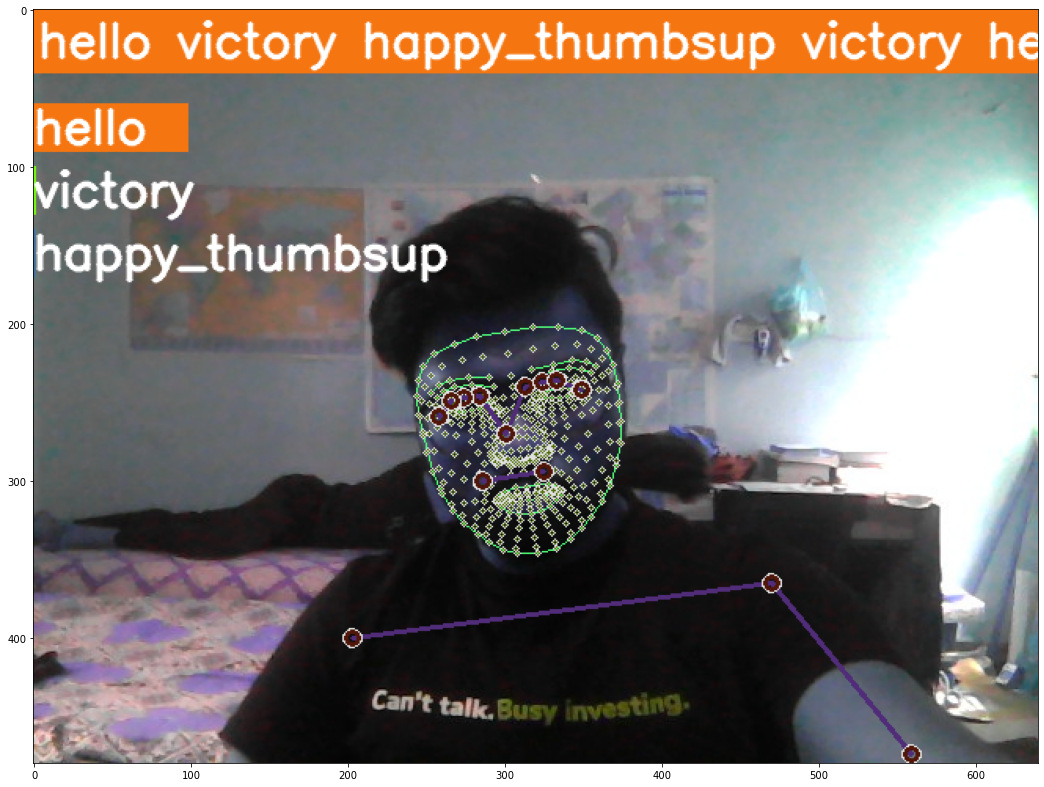

In [67]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [65]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-10:]
        
        if len(sequence) == 10:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.Solutio

victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.Soluti

victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solu

happy_thumbsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
happy_thumbsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
happy_thumbsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
happy_thumbsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
happy_thumbsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
happy_thumbsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
happy_thumbsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
happy_thumbsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
happy_thumbsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
happy_thumbsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
happy_thumbsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<clas

In [66]:
git init

SyntaxError: invalid syntax (Temp/ipykernel_13864/2830201818.py, line 1)